# Library

In [1]:
#These Library are imported from GATSBY WU
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None
import joblib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import gc
import calendar


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import matplotlib.ticker as ticker

from sklearn.linear_model import  RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import folium # for plotting latitudes and longitudes in map
from folium import plugins
from folium.plugins import HeatMap

# Import datasets

In [2]:
us_data = pd.read_csv('Datasets/US_Accidents_Dec21_updated.csv')
us_data.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   39.17239   

   Start_Lng  End_Lat   End_Lng  Distance(mi)  \
0  -83.09286 40.11206 -83.03187       3.23000   
1  -84.06280 39.86501 -84.04873       0.74700   
2  -84.52468 39.10209 -84.52396       0.05500   
3  -81.53784 41.06217 -81.53547       0.12300   
4  -84.49279 39.17048 -84.50180       0.50000   

                                         Description  Number       Street  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...     NaN  Outerbelt E   
1                 At OH-4/OH-235/Exit 41 - Accident.     NaN       I-70 E   
2                   At I-71/US-50/Exit 1 - Accident.     NaN       I-75 S   
3                    At Dart Ave/Exit 21 - Accident.     NaN       I-77 N   
4                 At Mitchell Ave/Exit 6 - Accident.     NaN       I-75 S   

  Side        City      County State Zipcode Country    Timezone Airport_Code  \
0    R      Dublin    Franklin    OH   43017      US  US/Eastern         KOSU   
1    R      Dayton  Montgomery    OH   45424      US  US/Eastern         KFFO   
2    R  Cincinnati    Hamilton    OH   45203      US  US/Eastern         KLUK   
3    R       Akron      Summit    OH   44311      US  US/Eastern         KAKR   
4    R  Cincinnati    Hamilton    OH   45217      US  US/Eastern         KLUK   

     Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0  2016-02-08 00:53:00        42.10000       36.10000     58.00000   
1  2016-02-08 05:58:00        36.90000            NaN     91.00000   
2  2016-02-08 05:53:00        36.00000            NaN     97.00000   
3  2016-02-08 06:54:00        39.00000            NaN     55.00000   
4  2016-02-08 07:53:00        37.00000       29.80000     93.00000   

   Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0      29.76000        10.00000             SW         10.40000   
1      29.68000        10.00000           Calm              NaN   
2      29.70000        10.00000           Calm              NaN   
3      29.65000        10.00000           Calm              NaN   
4      29.69000        10.00000            WSW         10.40000   

   Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  \
0            0.00000        Light Rain    False  False     False     False   
1            0.02000        Light Rain    False  False     False     False   
2            0.02000          Overcast    False  False     False     False   
3                NaN          Overcast    False  False     False     False   
4            0.01000        Light Rain    False  False     False     False   

   Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0     False    False    False       False    False  False            False   
1     False    False    False       False    False  False            False   
2      True    False    False       False    False  False            False   
3     False    False    False       False    False  False            False   
4     False    False    False       False    False  False            False   

   Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False         False          Night          Night   
1           False         False          Night          Night   
2           False         False          Night          Night   
3           False         False          Night          Night   
4           False         False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                 Night  
2             Night                

In [3]:
print('The Dataset contains: {} rows and {} columns.'.format(us_data.shape[0],us_data.shape[1]))

The Dataset contains: 2845342 rows and 47 columns.


In [4]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
#view the data in each column with numeric data
us_data.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count 2845342.00000 2845342.00000 2845342.00000 2845342.00000 2845342.00000   
mean        2.13757      36.24520     -97.11463      36.24532     -97.11439   
std         0.47872       5.36380      18.31782       5.36387      18.31763   
min         1.00000      24.56603    -124.54807      24.56601    -124.54575   
25%         2.00000      33.44517    -118.03311      33.44628    -118.03333   
50%         2.00000      36.09861     -92.41808      36.09799     -92.41772   
75%         2.00000      40.16024     -80.37243      40.16105     -80.37338   
max         4.00000      49.00058     -67.11317      49.07500     -67.10924   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count 2845342.00000 1101431.00000   2776068.00000  2375699.00000   
mean        0.70268    8089.40811        61.79356       59.65823   
std         1.56036   18360.09399        18.62263       21.16097   
min         0.00000       0.00000       -89.00000      -89.00000   
25%         0.05200    1270.00000        50.00000       46.00000   
50%         0.24400    4007.00000        64.00000       63.00000   
75%         0.76400    9567.00000        76.00000       76.00000   
max       155.18600 9999997.00000       196.00000      196.00000   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count 2772250.00000 2786142.00000   2774796.00000    2687398.00000   
mean       64.36545      29.47234         9.09939          7.39504   
std        22.87457       1.04529         2.71755          5.52745   
min         1.00000       0.00000         0.00000          0.00000   
25%        48.00000      29.31000        10.00000          3.50000   
50%        67.00000      29.82000        10.00000          7.00000   
75%        83.00000      30.01000        10.00000         10.00000   
max       100.00000      58.90000       140.00000       1087.00000   

       Precipitation(in)  
count      2295884.00000  
mean             0.00702  
std              0.09349  
min              0.00000  
25%              0.00000  
50%              0.00000  
75%              0.00000  
max             24.00000

In [6]:
missing_value = us_data.isna().sum(axis=0).sort_values(ascending=False)
missing_value = missing_value.to_frame()
missing_value.columns = ['missing_count']
missing_value = missing_value.loc[missing_value['missing_count']>0]

missing_value

missing_count
Number                       1743911
Precipitation(in)             549458
Wind_Chill(F)                 469643
Wind_Speed(mph)               157944
Wind_Direction                 73775
Humidity(%)                    73092
Weather_Condition              70636
Visibility(mi)                 70546
Temperature(F)                 69274
Pressure(in)                   59200
Weather_Timestamp              50736
Airport_Code                    9549
Timezone                        3659
Nautical_Twilight               2867
Civil_Twilight                  2867
Sunrise_Sunset                  2867
Astronomical_Twilight           2867
Zipcode                         1319
City                             137
Street                             2

In above table, we can see that the "Number" column has the most NULL value or missing count, so we will drop it.

In [145]:
us_data = us_data.drop("Number",axis=1)

KeyError: "['Number'] not found in axis"

In [208]:
us_data = us_data.dropna()

In [147]:
us_data.head()

ID  Severity          Start_Time             End_Time  Start_Lat  \
0    A-1         3 2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
4    A-5         3 2016-02-08 07:53:43  2016-02-08 13:53:43   39.17239   
7    A-8         2 2016-02-08 11:51:46  2016-02-08 17:51:46   41.37531   
9   A-10         2 2016-02-08 15:16:43  2016-02-08 21:16:43   40.10931   
10  A-11         2 2016-02-08 15:43:50  2016-02-08 21:43:50   39.19288   

    Start_Lng  End_Lat   End_Lng  Distance(mi)  \
0   -83.09286 40.11206 -83.03187       3.23000   
4   -84.49279 39.17048 -84.50180       0.50000   
7   -81.82017 41.36786 -81.82174       0.52100   
9   -82.96849 40.11078 -82.98400       0.82600   
10  -84.47723 39.19615 -84.47335       0.30700   

                                          Description       Street Side  \
0   Between Sawmill Rd/Exit 20 and OH-315/Olentang...  Outerbelt E    R   
4                  At Mitchell Ave/Exit 6 - Accident.       I-75 S    R   
7                   At Bagley Rd/Exit 235 - Accident.       I-71 S    R   
9                         At I-71/Exit 26 - Accident.  Outerbelt W    R   
10              At OH-4/Paddock Rd/Exit 9 - Accident.       I-75 N    R   

           City    County State Zipcode Country    Timezone Airport_Code  \
0        Dublin  Franklin    OH   43017      US  US/Eastern         KOSU   
4    Cincinnati  Hamilton    OH   45217      US  US/Eastern         KLUK   
7     Cleveland  Cuyahoga    OH   44130      US  US/Eastern         KCLE   
9   Westerville  Franklin    OH   43081      US  US/Eastern         KCMH   
10   Cincinnati  Hamilton    OH   45216      US  US/Eastern         KLUK   

      Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0   2016-02-08 00:53:00        42.10000       36.10000     58.00000   
4   2016-02-08 07:53:00        37.00000       29.80000     93.00000   
7   2016-02-08 11:51:00        33.10000       30.00000     92.00000   
9   2016-02-08 15:12:00        32.00000       28.70000    100.00000   
10  2016-02-08 15:47:00        33.80000       29.60000    100.00000   

    Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0       29.76000        10.00000             SW         10.40000   
4       29.69000        10.00000            WSW         10.40000   
7       29.63000         0.50000             SW          3.50000   
9       29.59000         0.50000           West          3.50000   
10      29.66000         3.00000            NNW          4.60000   

    Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  \
0             0.00000        Light Rain    False  False     False     False   
4             0.01000        Light Rain    False  False     False     False   
7             0.08000              Snow    False  False     False     False   
9             0.05000              Snow    False  False     False     False   
10            0.03000        Light Snow    False  False     False     False   

    Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0      False    False    False       False    False  False            False   
4      False    False    False       False    False  False            False   
7       True    False    False       False    False  False            False   
9      False    False    False       False    False  False            False   
10     False    False    False       False    False  False            False   

    Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
0            False         False          Night          Night   
4            False         False            Day            Day   
7            False         False            Day            Day   
9            False         False            Day            Day   
10           False         False            Day            Day   

   Nautical_Twilight Astronomical_Twilight  
0              Night                 Night  
4                Day                   Day  
7                Day              

# Top 10 Accident states in US (2016 - 2021) 

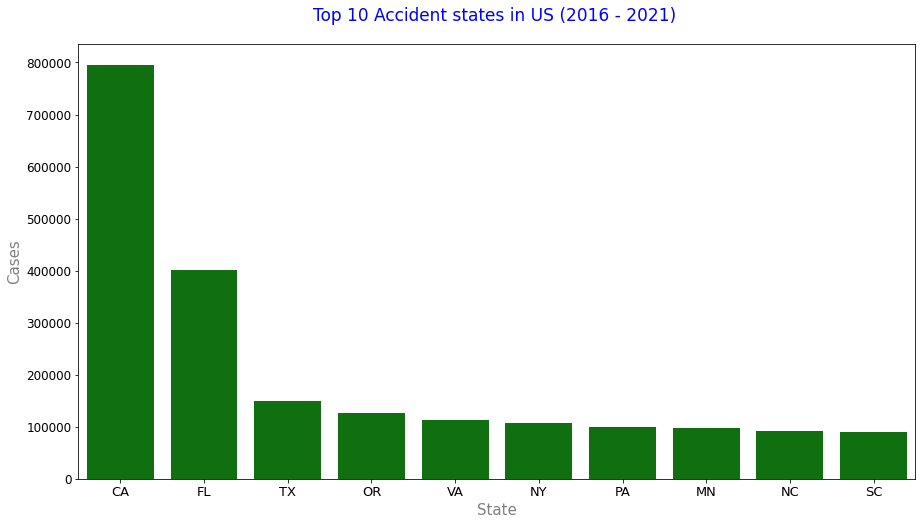

In [9]:
state = pd.DataFrame(us_data.State.value_counts()).reset_index().rename(columns={"index":"State","State":"Cases"})
top_state = pd.DataFrame(state.head(10))
plt.figure(figsize=(15,8))
plt.title("Top {} Accident states in US (2016 - 2021) ".format(len(top_state)),size=17,color="Blue",y=1.04)
plt.xlabel('\n States \n', fontsize = 15, color = 'grey')
plt.ylabel('\nAccident Cases\n', fontsize = 15, color = 'grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x = top_state.State, y=state.Cases,color= "Green")
plt.show()

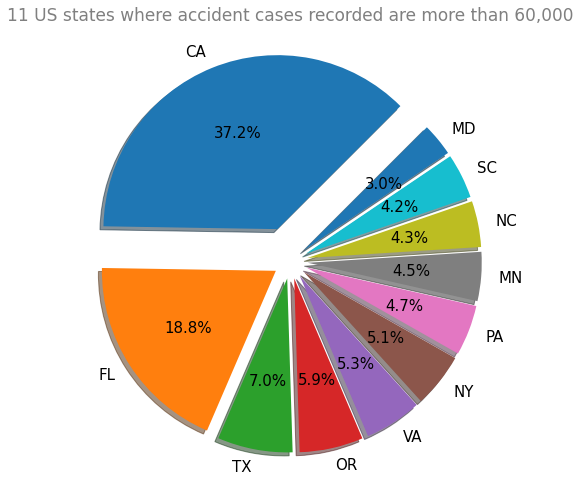

In [10]:
#As there are 10657 unique cities, we cant plot data for all of them.
#So, I only plot data of cities which had reported more than 10k accident cases.
a = us_data.State.value_counts()
plt.figure(figsize=(10,8))
lab = a[a>60000].index
plt.title("{} US states where accident cases recorded are more than 60,000".format(len(lab)),size=17,color="grey",y=1.04)
plt.pie(a[a>60000],shadow=True,explode=(0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), startangle=45,labels=lab,autopct='%1.1f%%',textprops={'fontsize': 15})
plt.show()

# Top 10 Accident Cities in US (2016 - 2021) 

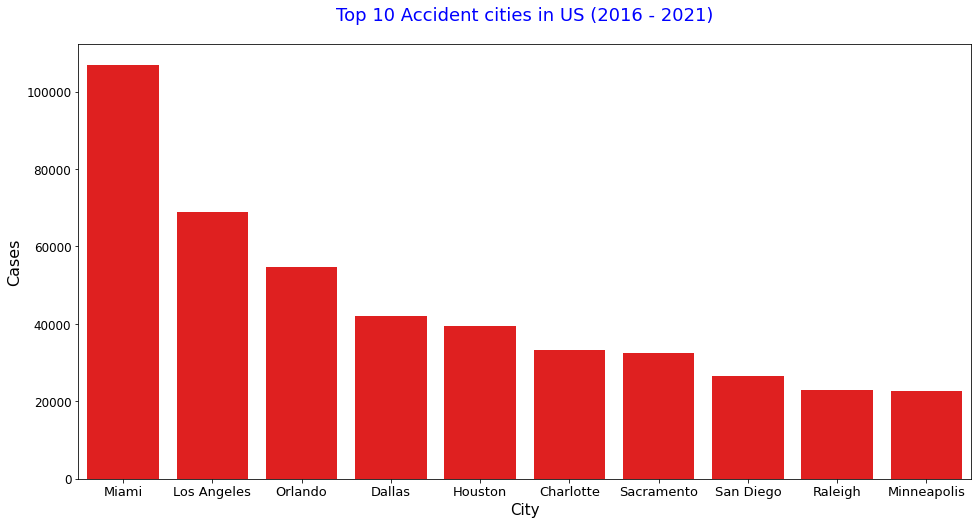

In [11]:
city = pd.DataFrame(us_data.City.value_counts()).reset_index().rename(columns={"index":"City", "City":"Cases"})
top_city = pd.DataFrame(city.head(10))
plt.figure(figsize=(16, 8))
plt.title("Top {} Accident cities in US (2016 - 2021)".format(len(top_city)), size=18, color='blue', y=1.04)
plt.xlabel('\n City \n', fontsize = 15, color = 'black')
plt.ylabel('\nAccident Cases\n', fontsize = 16, color = 'black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x = top_city.City, y=city.Cases,color= "red")
plt.show()

In [12]:
#Showing the percentage of the accident cases reported on the city.

for (i, j) in zip(city["City"], range(0,10)):
    print("Percentage of accident cases reported in city : {} is {:.2f}%".format(i, (city.Cases[j]/len(city.Cases))))

Percentage of accident cases reported in city : Miami is 9.16%
Percentage of accident cases reported in city : Los Angeles is 5.90%
Percentage of accident cases reported in city : Orlando is 4.68%
Percentage of accident cases reported in city : Dallas is 3.59%
Percentage of accident cases reported in city : Houston is 3.38%
Percentage of accident cases reported in city : Charlotte is 2.84%
Percentage of accident cases reported in city : Sacramento is 2.79%
Percentage of accident cases reported in city : San Diego is 2.28%
Percentage of accident cases reported in city : Raleigh is 1.96%
Percentage of accident cases reported in city : Minneapolis is 1.95%


# Accident different hour in the day

In [13]:
# Make the first parse the Start_Time column as a datetime column.
us_data.Start_Time = pd.to_datetime(us_data.Start_Time)

In [14]:
hour = pd.DataFrame(us_data.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})

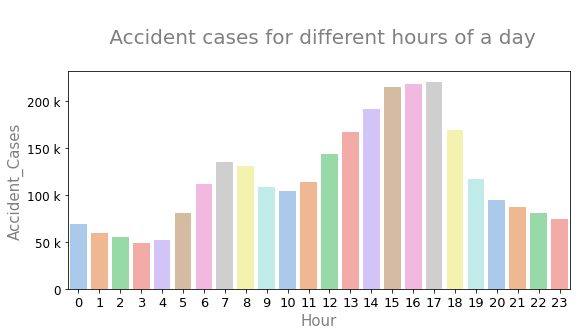

In [15]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different hours of a day\n', size=20, color='grey')
plt.xlabel('\n Hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=hour.Hour,y=hour.Accident_Cases,palette="pastel")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

# Accident cases in 24 hours in some days a week.

we can go inside each day a week to see the different between weekday and weekend.

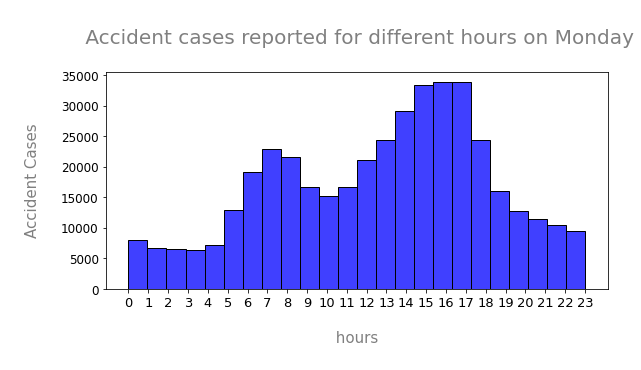

In [16]:
# Let's bring Tueday to be weekday sample.
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Monday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

monday = us_data.Start_Time[us_data.Start_Time.dt.dayofweek==0]
a = sns.histplot(monday.dt.hour,bins=24,color="blue")
a.xaxis.set_ticks(range(0,24))
# More accidents take place in the morning and in the evening after people are going to/coming from their job.
plt.show()

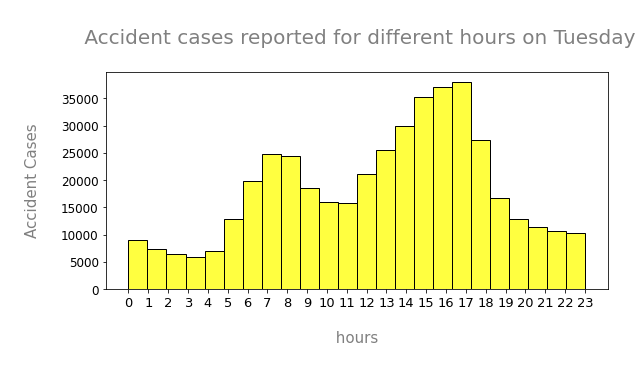

In [17]:
# Let's bring Tueday to be weekday sample.
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Tuesday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

tuesday = us_data.Start_Time[us_data.Start_Time.dt.dayofweek==1]
a = sns.histplot(tuesday.dt.hour,bins=24,color="yellow")
a.xaxis.set_ticks(range(0,24))
# More accidents take place in the morning and in the evening after people are going to/coming from their job.
plt.show()

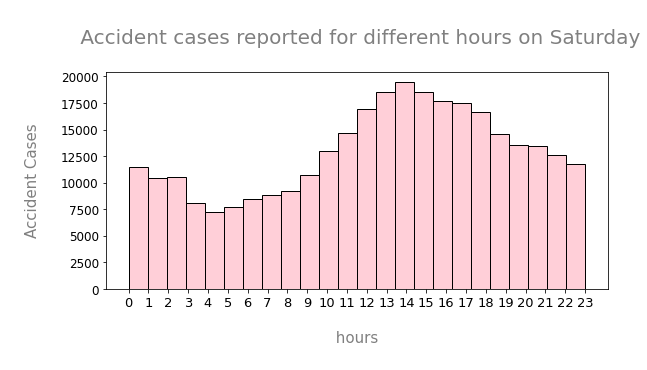

In [18]:
# Let's bring Tueday to be weekday sample.
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Saturday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

saturday = us_data.Start_Time[us_data.Start_Time.dt.dayofweek==5]
a = sns.histplot(saturday.dt.hour,bins=24,color="pink")
a.xaxis.set_ticks(range(0,24))
# More accidents take place in the morning and in the evening after people are going to/coming from their job.
plt.show()

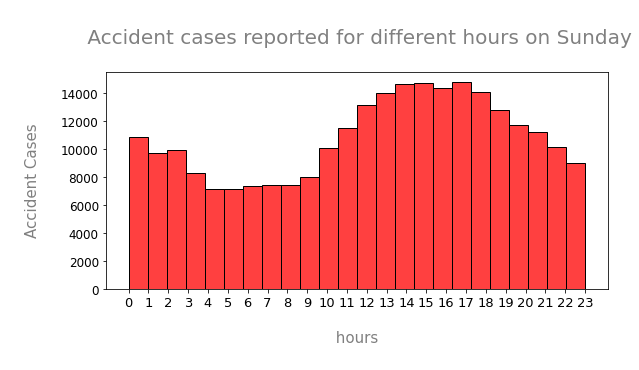

In [19]:
# Let's bring Tueday to be weekday sample.
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different hours on Sunday\n', size=20, color='grey')
plt.xlabel('\n hours \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

sunday = us_data.Start_Time[us_data.Start_Time.dt.dayofweek==6]
a = sns.histplot(sunday.dt.hour,bins=24,color="Red")
a.xaxis.set_ticks(range(0,24))
# More accidents take place in the morning and in the evening after people are going to/coming from their job.
plt.show()

# Let's compare Top Three States ( California, Florida, and Texas)

In [20]:
Texas = us_data[us_data["State"] == 'TX']
# Make the first parse the Start_Time column as a datetime column.
Texas.Start_Time = pd.to_datetime(Texas.Start_Time)

In [21]:
Texas_hour = pd.DataFrame(Texas.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})

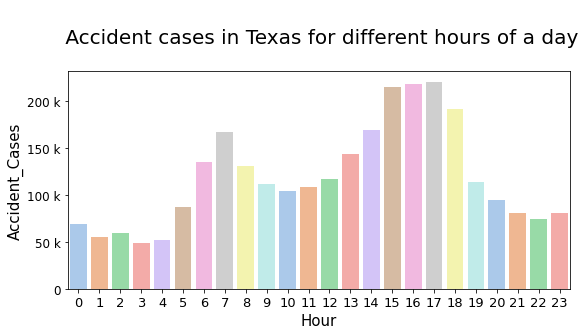

In [22]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases in Texas for different hours of a day\n', size=20, color='Black')
plt.xlabel('\n Hours \n', fontsize=15, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='Black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=Texas_hour.Hour,y=hour.Accident_Cases,palette="pastel")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [23]:
Cal = us_data[us_data["State"] == 'CA']
# Make the first parse the Start_Time column as a datetime column.
Cal.Start_Time = pd.to_datetime(Cal.Start_Time)

In [24]:
Cal_hour = pd.DataFrame(Cal.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})

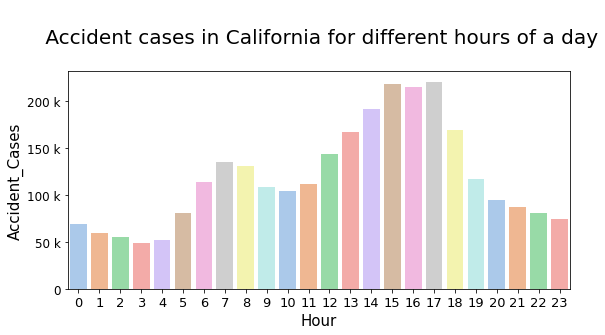

In [25]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases in California for different hours of a day\n', size=20, color='Black')
plt.xlabel('\n Hours \n', fontsize=15, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='Black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=Cal_hour.Hour,y=hour.Accident_Cases,palette="pastel")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [26]:
Flo = us_data[us_data["State"] == 'FL']
# Make the first parse the Start_Time column as a datetime column.
Flo.Start_Time = pd.to_datetime(Flo.Start_Time)

In [27]:
Flo_hour = pd.DataFrame(Flo.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})

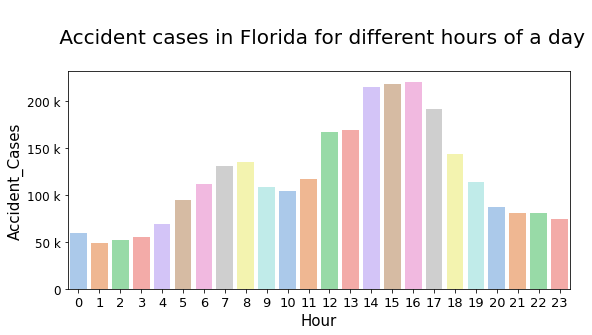

In [28]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases in Florida for different hours of a day\n', size=20, color='Black')
plt.xlabel('\n Hours \n', fontsize=15, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='Black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=Flo_hour.Hour,y=hour.Accident_Cases,palette="pastel")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

# Accident by day in the week

In [29]:
day = pd.DataFrame(us_data.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})


         Day   Cases
0     Friday  492074
1   Thursday  463477
2  Wednesday  455037
3    Tuesday  443968
4     Monday  419821
5   Saturday  311691
6     Sunday  259274


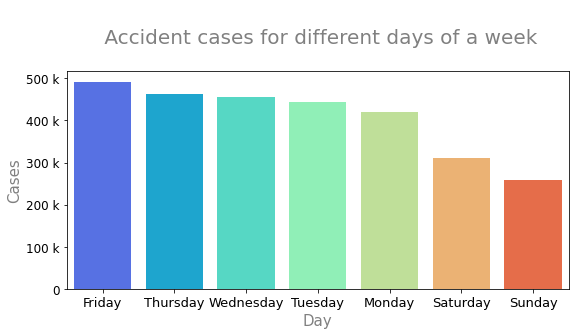

In [30]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different days of a week\n', size=20, color='grey')
plt.xlabel('\n Day \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(day)
a = sns.barplot(x=day.Day,y=day.Cases,palette="rainbow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

# Accident cases by month

In [31]:
month = pd.DataFrame(us_data)

# Accident by Timezone

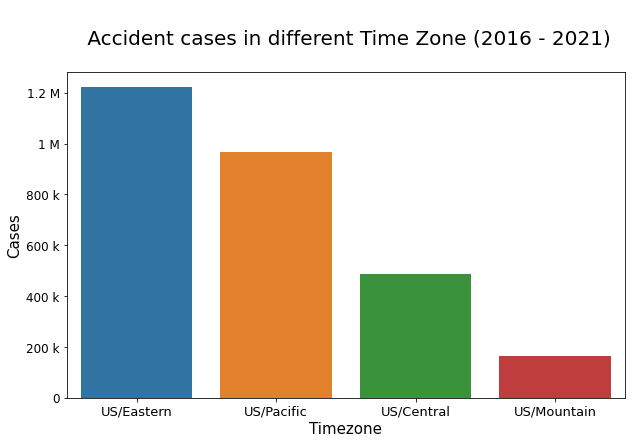

In [32]:
timezone = pd.DataFrame(us_data.Timezone.value_counts()).reset_index().rename(columns={'index':'Timezone',"Timezone":"Cases"})
plt.figure(figsize = (10,6))
plt.title("\n Accident cases in different Time Zone (2016 - 2021)\n", size = 20)
plt.xlabel('\n Timezone \n', fontsize = 15)
plt.ylabel('\nAccident Cases\n', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=timezone.Timezone, y = timezone.Cases)
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [33]:
#credit the choropleth diagram code to PRAJWAL670 from kaggle.com

df_states_count = pd.value_counts(us_data['State'])

fig = px.choropleth(
    us_data,
    locations=df_states_count.index,
    color_continuous_scale='spectral_r',
    locationmode='USA-states',
    color=df_states_count.values.astype(float),
    title="The accidents case by State",
    scope="usa"
)
fig.show()

# Most used word in the description 

In [34]:
text = ''.join(us_data.Description)

In [35]:
#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#wordcloud = WordCloud(max_font_size=800, max_words=160, background_color="white").generate(text)
#plt.figure(figsize=(22,26))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

# Does the temperature affect the number of US accidents? 

In [36]:
temperature = us_data['Temperature(F)'].value_counts()
temperature.head(30)

73.00000    64505
77.00000    63575
75.00000    60534
72.00000    59681
68.00000    58557
63.00000    58259
64.00000    57937
70.00000    57760
66.00000    56336
59.00000    56025
79.00000    55673
61.00000    54665
57.00000    54071
54.00000    53802
50.00000    52562
55.00000    50800
81.00000    50612
52.00000    48536
82.00000    47973
76.00000    43048
74.00000    43009
48.00000    40847
78.00000    40161
71.00000    39730
84.00000    39688
69.00000    39277
65.00000    38460
67.00000    38390
46.00000    38361
80.00000    37618
Name: Temperature(F), dtype: int64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

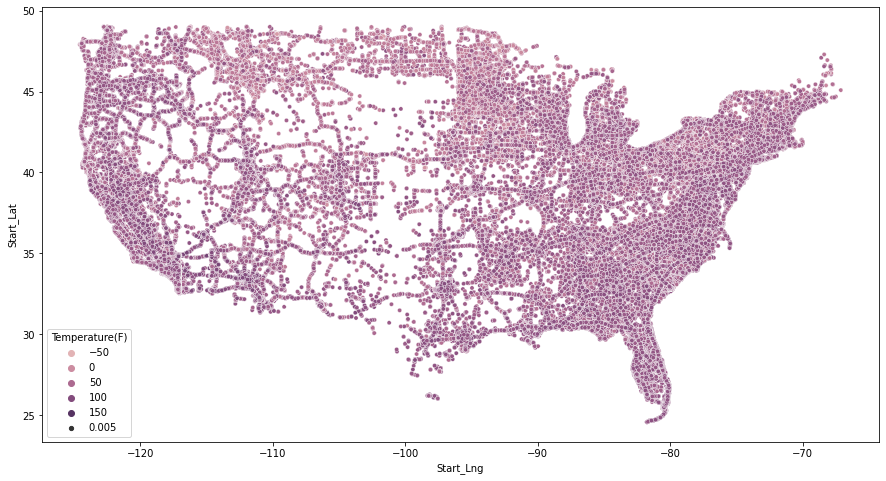

In [37]:
#Start_Lat
#new_data=data.groupby(['Start_Lat','Start_Lng'])['ID'].
plt.figure(figsize=(15,8))
sns.scatterplot(x="Start_Lng", y="Start_Lat",
              hue="Temperature(F)",
              data=us_data,size=0.005)

In [38]:
from scipy import stats


#paired t-test

#all the accident at the cold temperature(32-50 F)
group1 = us_data[(us_data['Temperature(F)'] <= 55) & (us_data['Temperature(F)'] >= 24)]

#All the accident at the hot temperature(70-110 F)
group2 = us_data[(us_data['Temperature(F)'] <= 120) & (us_data['Temperature(F)'] >= 73)]

#stats.ttest_rel(group1,group2)

In [39]:
temp_group1 = list(group1['Severity'])
temp_group2 = list(group2['Severity'])

print("group 1", len(temp_group1))
print("group 2", len(temp_group2))

#del temp_group2[1:2223

sns.boxplot(x='grouping', y='height', data=df)

group 1 899454
group 2 901676


In [40]:
stats.ttest_rel(temp_group1[1:890000], temp_group2[1:890000])

Ttest_relResult(statistic=52.23562272643214, pvalue=0.0)

In [41]:
mean1 = sum(temp_group1)/len(temp_group1)
mean2 = sum(temp_group2)/len(temp_group2)
print("group 1", mean1)
print("group 2", mean2)

group 1 2.154511514763401
group 2 2.1209248111294965


# Most Ohio accidents happened in Temperature(F)

In [205]:
Ohio = us_data[us_data["State"] == 'OH']

Tem = Ohio['Temperature(F)']

Ohio_3000 =list(Tem[:3000])
mean_ohio3000 = sum(Ohio_3000)/(len(Ohio_3000))
print("The average of the temperature in Ohio when accident occurred in first", len(Ohio_3000) ,"accidents : ",mean_ohio3000)

stats.ttest_1samp(a=Ohio_3000, popmean=56.64)

The average of the temperature in Ohio when accident occurred in first 3000 accidents :  55.47756666666667


Ttest_1sampResult(statistic=-3.3502181133001194, pvalue=0.0008174694581863895)

In [200]:
mean_temp = sum(Tem)/(len(Tem))
print("The average of the temperature in Ohio when accident occurred in", len(Tem) ,"accidents : ", mean_temp)
Ohio_1000 =list(Tem[:1000])
mean_ohio1000 = sum(Ohio_1000)/(len(Ohio_1000))
print("The average of the temperature in Ohio when accident occurred in first", len(Ohio_1000) ,"accidents : ",mean_ohio1000)
Ohio_2000 =list(Tem[:2000])
mean_ohio2000 = sum(Ohio_2000)/(len(Ohio_2000))
print("The average of the temperature in Ohio when accident occurred in first", len(Ohio_2000) ,"accidents : ",mean_ohio2000)
Ohio_3000 =list(Tem[:3000])
mean_ohio3000 = sum(Ohio_3000)/(len(Ohio_3000))
print("The average of the temperature in Ohio when accident occurred in first", len(Ohio_3000) ,"accidents : ",mean_ohio3000)
Ohio_5000 =list(Tem[:5000])
mean_ohio5000 = sum(Ohio_5000)/(len(Ohio_5000))
print("The average of the temperature in Ohio when accident occurred in first", len(Ohio_5000) ,"accidents : ",mean_ohio5000)


The average of the temperature in Ohio when accident occurred in 11355 accidents :  56.64336415675905
The average of the temperature in Ohio when accident occurred in first 1000 accidents :  46.37070000000001
The average of the temperature in Ohio when accident occurred in first 2000 accidents :  53.247350000000004
The average of the temperature in Ohio when accident occurred in first 3000 accidents :  55.47756666666667
The average of the temperature in Ohio when accident occurred in first 5000 accidents :  53.925340000000006


In [201]:
USA_Tem = us_data['Temperature(F)']
mean_usa_temp = sum(USA_Tem)/(len(USA_Tem))
print("The average of the temperature in Ohio when accident occurred in", len(Tem) ,"accidents : ", mean_usa_temp)

The average of the temperature in Ohio when accident occurred in 11355 accidents :  61.83808279251843


In [185]:
stats.ttest_1samp(a=[21, 24, 18, 17, 14, 23, 22, 20, 19, 18, 24, 18], popmean=20)


Ttest_1sampResult(statistic=-0.18806853782495003, pvalue=0.8542474037341081)

## The US accident counts on the temperature

In [42]:
weather = us_data.iloc[:, 20:30]
weather['Severity'] = us_data['Severity']
weather.head()

Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0        42.10000       36.10000     58.00000      29.76000        10.00000   
1        36.90000            NaN     91.00000      29.68000        10.00000   
2        36.00000            NaN     97.00000      29.70000        10.00000   
3        39.00000            NaN     55.00000      29.65000        10.00000   
4        37.00000       29.80000     93.00000      29.69000        10.00000   

  Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0             SW         10.40000            0.00000        Light Rain   
1           Calm              NaN            0.02000        Light Rain   
2           Calm              NaN            0.02000          Overcast   
3           Calm              NaN                NaN          Overcast   
4            WSW         10.40000            0.01000        Light Rain   

   Amenity  Severity  
0    False         3  
1    False         2  
2    False         2  
3    False         2  
4    False         3

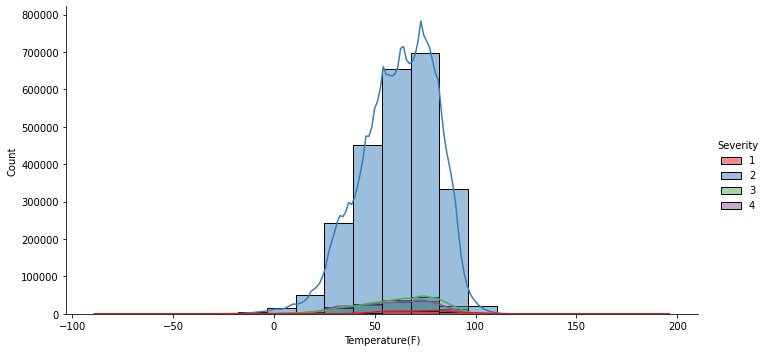

In [43]:
sns.displot(weather, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

# Removing all categorically data to see correlation

In [44]:
#working with only numbers right now
df_c = us_data.select_dtypes(include='number')
df_c.head()


Severity  Start_Lat  Start_Lng  End_Lat   End_Lng  Distance(mi)  \
0         3   40.10891  -83.09286 40.11206 -83.03187       3.23000   
1         2   39.86542  -84.06280 39.86501 -84.04873       0.74700   
2         2   39.10266  -84.52468 39.10209 -84.52396       0.05500   
3         2   41.06213  -81.53784 41.06217 -81.53547       0.12300   
4         3   39.17239  -84.49279 39.17048 -84.50180       0.50000   

   Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0        42.10000       36.10000     58.00000      29.76000        10.00000   
1        36.90000            NaN     91.00000      29.68000        10.00000   
2        36.00000            NaN     97.00000      29.70000        10.00000   
3        39.00000            NaN     55.00000      29.65000        10.00000   
4        37.00000       29.80000     93.00000      29.69000        10.00000   

   Wind_Speed(mph)  Precipitation(in)  
0         10.40000            0.00000  
1              NaN            0.02000  
2              NaN            0.02000  
3              NaN                NaN  
4         10.40000            0.01000

In [45]:
df_c.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
dtype: object

In [46]:
us_data.head()

ID  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1         3 2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2         2 2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-3         2 2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-4         2 2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   
4  A-5         3 2016-02-08 07:53:43  2016-02-08 13:53:43   39.17239   

   Start_Lng  End_Lat   End_Lng  Distance(mi)  \
0  -83.09286 40.11206 -83.03187       3.23000   
1  -84.06280 39.86501 -84.04873       0.74700   
2  -84.52468 39.10209 -84.52396       0.05500   
3  -81.53784 41.06217 -81.53547       0.12300   
4  -84.49279 39.17048 -84.50180       0.50000   

                                         Description       Street Side  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  Outerbelt E    R   
1                 At OH-4/OH-235/Exit 41 - Accident.       I-70 E    R   
2                   At I-71/US-50/Exit 1 - Accident.       I-75 S    R   
3                    At Dart Ave/Exit 21 - Accident.       I-77 N    R   
4                 At Mitchell Ave/Exit 6 - Accident.       I-75 S    R   

         City      County State Zipcode Country    Timezone Airport_Code  \
0      Dublin    Franklin    OH   43017      US  US/Eastern         KOSU   
1      Dayton  Montgomery    OH   45424      US  US/Eastern         KFFO   
2  Cincinnati    Hamilton    OH   45203      US  US/Eastern         KLUK   
3       Akron      Summit    OH   44311      US  US/Eastern         KAKR   
4  Cincinnati    Hamilton    OH   45217      US  US/Eastern         KLUK   

     Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0  2016-02-08 00:53:00        42.10000       36.10000     58.00000   
1  2016-02-08 05:58:00        36.90000            NaN     91.00000   
2  2016-02-08 05:53:00        36.00000            NaN     97.00000   
3  2016-02-08 06:54:00        39.00000            NaN     55.00000   
4  2016-02-08 07:53:00        37.00000       29.80000     93.00000   

   Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0      29.76000        10.00000             SW         10.40000   
1      29.68000        10.00000           Calm              NaN   
2      29.70000        10.00000           Calm              NaN   
3      29.65000        10.00000           Calm              NaN   
4      29.69000        10.00000            WSW         10.40000   

   Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  \
0            0.00000        Light Rain    False  False     False     False   
1            0.02000        Light Rain    False  False     False     False   
2            0.02000          Overcast    False  False     False     False   
3                NaN          Overcast    False  False     False     False   
4            0.01000        Light Rain    False  False     False     False   

   Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0     False    False    False       False    False  False            False   
1     False    False    False       False    False  False            False   
2      True    False    False       False    False  False            False   
3     False    False    False       False    False  False            False   
4     False    False    False       False    False  False            False   

   Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False         False          Night          Night   
1           False         False          Night          Night   
2           False         False          Night          Night   
3           False         False          Night          Night   
4           False         False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                 Night  
2             Night                   Day  
3               Day                   Day  
4

In [47]:
df_c.corr()

Severity  Start_Lat  Start_Lng  End_Lat  End_Lng  \
Severity            1.00000    0.08921    0.11406  0.08921  0.11406   
Start_Lat           0.08921    1.00000   -0.15496  1.00000 -0.15496   
Start_Lng           0.11406   -0.15496    1.00000 -0.15496  1.00000   
End_Lat             0.08921    1.00000   -0.15496  1.00000 -0.15495   
End_Lng             0.11406   -0.15496    1.00000 -0.15495  1.00000   
Distance(mi)        0.09214    0.07159    0.03986  0.07159  0.03983   
Temperature(F)     -0.04534   -0.47507    0.03216 -0.47506  0.03216   
Wind_Chill(F)      -0.09746   -0.50557    0.01085 -0.50556  0.01085   
Humidity(%)         0.03780    0.00588    0.17091  0.00587  0.17090   
Pressure(in)        0.04388   -0.23489    0.20883 -0.23490  0.20883   
Visibility(mi)      0.00737   -0.08654    0.02934 -0.08653  0.02934   
Wind_Speed(mph)     0.04838    0.02916    0.09056  0.02916  0.09057   
Precipitation(in)   0.01384   -0.00284    0.02409 -0.00284  0.02409   

                   Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
Severity                0.09214        -0.04534       -0.09746      0.03780   
Start_Lat               0.07159        -0.47507       -0.50557      0.00588   
Start_Lng               0.03986         0.03216        0.01085      0.17091   
End_Lat                 0.07159        -0.47506       -0.50556      0.00587   
End_Lng                 0.03983         0.03216        0.01085      0.17090   
Distance(mi)            1.00000        -0.05121       -0.06009      0.02686   
Temperature(F)         -0.05121         1.00000        0.99386     -0.36653   
Wind_Chill(F)          -0.06009         0.99386        1.00000     -0.34603   
Humidity(%)             0.02686        -0.36653       -0.34603      1.00000   
Pressure(in)           -0.06912         0.13776        0.13431      0.13882   
Visibility(mi)         -0.03400         0.21113        0.21757     -0.36330   
Wind_Speed(mph)         0.01113         0.07879        0.01301     -0.17410   
Precipitation(in)       0.00305        -0.00442       -0.00829      0.07766   

                   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
Severity                0.04388         0.00737          0.04838   
Start_Lat              -0.23489        -0.08654          0.02916   
Start_Lng               0.20883         0.02934          0.09056   
End_Lat                -0.23490        -0.08653          0.02916   
End_Lng                 0.20883         0.02934          0.09057   
Distance(mi)           -0.06912        -0.03400          0.01113   
Temperature(F)          0.13776         0.21113          0.07879   
Wind_Chill(F)           0.13431         0.21757          0.01301   
Humidity(%)             0.13882        -0.36330         -0.17410   
Pressure(in)            1.00000         0.03638         -0.03430   
Visibility(mi)          0.03638         1.00000          0.03618   
Wind_Speed(mph)        -0.03430         0.03618          1.00000   
Precipitation(in)       0.01369        -0.12162          0.02717   

                   Precipitation(in)  
Severity                     0.01384  
Start_Lat                   -0.00284  
Start_Lng                    0.02409  
End_Lat                     -0.00284  
End_Lng                      0.02409  
Distance(mi)                 0.00305  
Temperature(F)              -0.00442  
Wind_Chill(F)               -0.00829  
Humidity(%)                  0.07766  
Pressure(in)                 0.01369  
Visibility(mi)              -0.12162  
Wind_Speed(mph)              0.02717  
Precipitation(in)            1.00000

In [48]:
def top_entries(df):
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    # Unstack, sort ascending, and reset the index, so features are in columns
    # instead of indexes (allowing e.g. a pretty print in Jupyter).
    # Also rename these it for good measure.
    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "feature_a",
                 "level_1": "feature_b",
                 0: "correlation"
             }))

In [49]:
corr_df = top_entries(df_c)

In [50]:
#print the highest corr
corr_df.head()

feature_a      feature_b  correlation
0       Start_Lng        End_Lng      1.00000
1       Start_Lat        End_Lat      1.00000
2  Temperature(F)  Wind_Chill(F)      0.99386
3       Start_Lat  Wind_Chill(F)      0.50557
4         End_Lat  Wind_Chill(F)      0.50556

<AxesSubplot:>

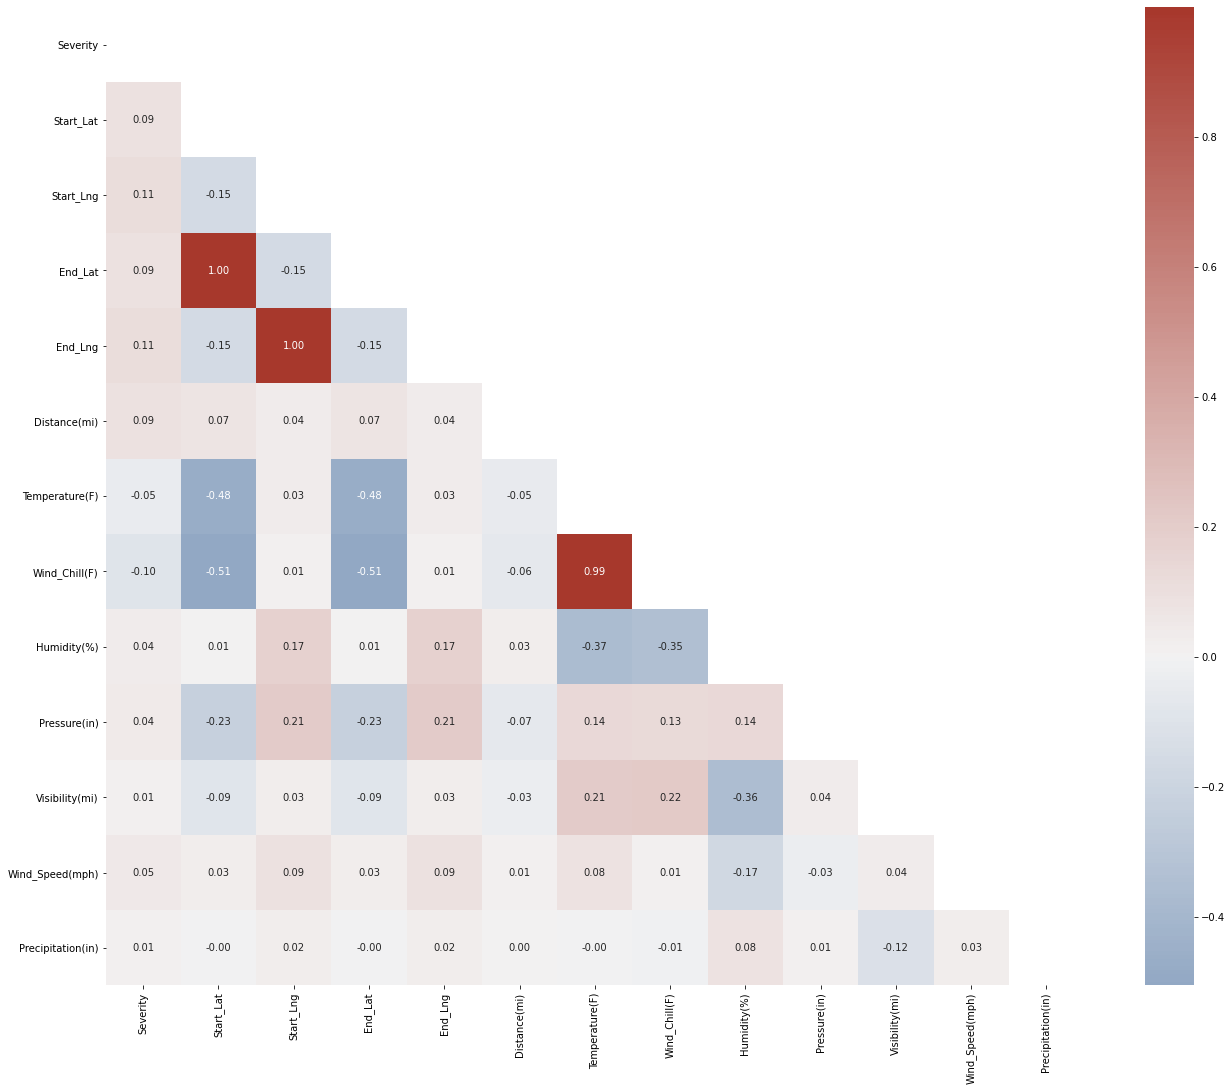

In [51]:
from matplotlib import cm
matrix = df_c.corr()

# Create a mask
plt.figure(figsize=(22,18))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [52]:
stats.norm.cdf(1700,1500,50)

0.9999683287581669

# Single-sample t-test (Average of Texas Vs. States)

In [53]:
stats.ttest_1samp(a=[21, 24, 18, 17, 14, 23, 22, 20, 19, 18, 24, 18], popmean=20)

Ttest_1sampResult(statistic=-0.18806853782495003, pvalue=0.8542474037341081)

In [96]:
#find the average of the United States
US = us_data[us_data["State"] != 'TX']

#find the average of the Texas
Texas = us_data[us_data["State"] == 'TX']

US_mean = US["Severity"].mean()
print('US mean is ' , US_mean)

Texas_mean = Texas["Severity"].mean()
print('Texas mean is ', Texas_mean)

print(stats.ttest_1samp(list(Texas["Severity"]), popmean = US_mean))
res = stats.ttest_1samp(list(Texas["Severity"]), US_mean)
print(res.pvalue)
print('%.60f' % res.pvalue)

US mean is  2.13495320447798
Texas mean is  2.184940652321236
Ttest_1sampResult(statistic=40.83685484051053, pvalue=0.0)
0.0
0.000000000000000000000000000000000000000000000000000000000000


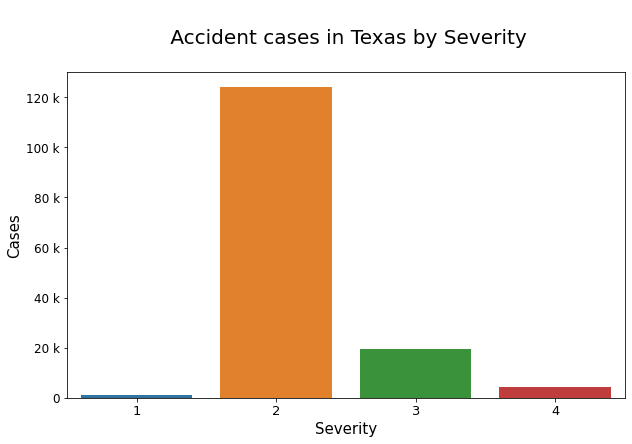

In [97]:
TX = pd.DataFrame(Texas.Severity.value_counts()).reset_index().rename(columns={'index':'Severity',"Severity":"Cases"})
plt.figure(figsize = (10,6))
plt.title("\n Accident cases in Texas by Severity\n", size = 20)
plt.xlabel('\n Severity \n', fontsize = 15)
plt.ylabel('\nAccident Cases\n', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=TX.Severity, y = TX.Cases)
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

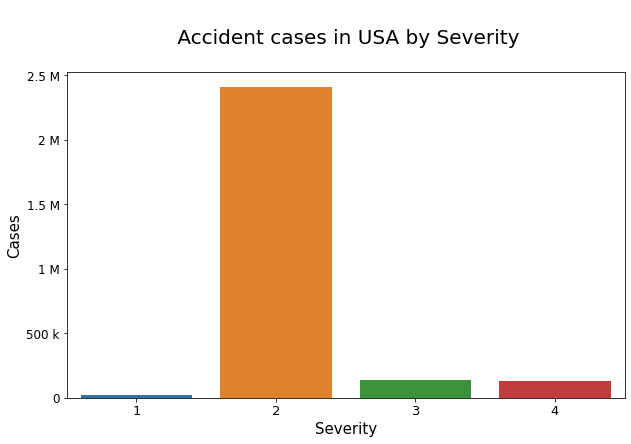

In [98]:
USA = pd.DataFrame(US.Severity.value_counts()).reset_index().rename(columns={'index':'Severity',"Severity":"Cases"})
plt.figure(figsize = (10,6))
plt.title("\n Accident cases in USA by Severity\n", size = 20)
plt.xlabel('\n Severity \n', fontsize = 15)
plt.ylabel('\nAccident Cases\n', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=USA.Severity, y = USA.Cases)
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

## Chi Square

In [209]:
US['Bump'].value_counts(normalize=True)

False   0.99964
True    0.00036
Name: Bump, dtype: float64

In [210]:
California = us_data[us_data["State"] == 'CA']

In [211]:
CA_False_Crossing ,CA_True_Crossing = California['Crossing'].value_counts(normalize=False)
print(CA_True_Crossing)
print(CA_False_Crossing)

TX_False_Crossing ,TX_True_Crossing = Texas['Crossing'].value_counts(normalize=False)
print(TX_True_Crossing)
print(TX_False_Crossing)

25566
578911
8704
140333


In [212]:
Texas['Crossing'].value_counts(normalize=False)

False    140333
True       8704
Name: Crossing, dtype: int64

In [213]:
from scipy.stats import chi2_contingency

info = [[TX_True_Crossing, TX_False_Crossing], [CA_True_Crossing, CA_False_Crossing]]

chi2_contingency(info)

(714.1492201768474,
 2.50557135307476e-157,
 1,
 array([[  6778.23901082, 142258.76098918],
        [ 27491.76098918, 576985.23901082]]))

In [214]:
stats.fisher_exact (info, alternative = 'two-sided')

(1.4044558453912814, 3.0068823713518175e-148)

In [215]:
us_data['Weather_Condition'].value_counts(normalize=False).head(25)

Fair                       1042415
Cloudy                      334793
Mostly Cloudy               285317
Partly Cloudy               195367
Light Rain                  106754
Light Snow                   40157
Fog                          37214
Haze                         29095
Rain                         24802
Fair / Windy                 14483
Heavy Rain                    9847
Thunder in the Vicinity       6739
Cloudy / Windy                6532
T-Storm                       6338
Mostly Cloudy / Windy         6183
Smoke                         5971
Thunder                       5922
Light Drizzle                 5696
Light Rain with Thunder       5218
Snow                          4635
Overcast                      3974
Wintry Mix                    3824
Partly Cloudy / Windy         3775
Heavy T-Storm                 3539
Light Rain / Windy            3314
Name: Weather_Condition, dtype: int64

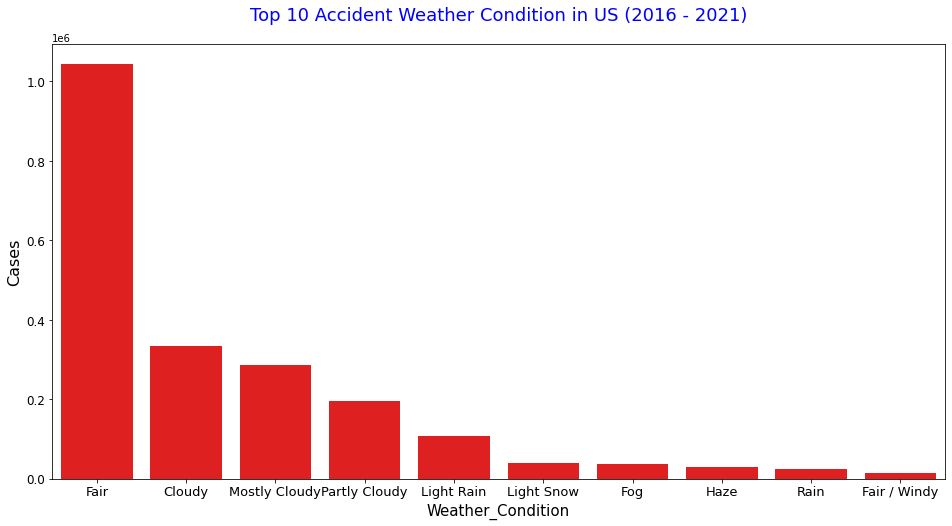

In [216]:
Weather = pd.DataFrame(us_data.Weather_Condition.value_counts()).reset_index().rename(columns={"index":"Weather_Condition", "Weather_Condition":"Cases"})
top_weather = pd.DataFrame(Weather.head(10))
plt.figure(figsize=(16, 8))
plt.title("Top {} Accident Weather Condition in US (2016 - 2021)".format(len(top_weather)), size=18, color='blue', y=1.04)
plt.xlabel('\n Weather Condition \n', fontsize = 15, color = 'black')
plt.ylabel('\nAccident Cases\n', fontsize = 16, color = 'black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x = top_weather.Weather_Condition, y=Weather.Cases,color= "red")
plt.show()

In [224]:


Mostly_ser1 = us_data[(us_data['Severity'] == 1) & (us_data['Weather_Condition'] == 'Mostly Cloudy')]
val_Mostly_ser1 = int(Mostly_ser1['Weather_Condition'].value_counts(normalize=False))
print("Mostly Cloudy Serverity 1  = ",val_Mostly_ser1)
Mostly_ser2 = us_data[(us_data['Severity'] == 2) & (us_data['Weather_Condition'] == 'Mostly Cloudy')]
val_Mostly_ser2 = int(Mostly_ser2['Weather_Condition'].value_counts(normalize=False))
print("Mostly Cloudy Serverity 2  = ",val_Mostly_ser2)
Mostly_ser3 = us_data[(us_data['Severity'] == 3) & (us_data['Weather_Condition'] == 'Mostly Cloudy')]
val_Mostly_ser3 = int(Mostly_ser3['Weather_Condition'].value_counts(normalize=False))
print("Mostly Cloudy Serverity 3  = ",val_Mostly_ser3)
Mostly_ser4 = us_data[(us_data['Severity'] == 4) & (us_data['Weather_Condition'] == 'Mostly Cloudy')]
val_Mostly_ser4 = int(Mostly_ser4['Weather_Condition'].value_counts(normalize=False))
print("Mostly Cloudy Serverity 4  = ",val_Mostly_ser4)

print(val_Mostly_ser1 + val_Mostly_ser2 + val_Mostly_ser3 + val_Mostly_ser4)

Mostly Cloudy Serverity 1  =  4084
Mostly Cloudy Serverity 2  =  263146
Mostly Cloudy Serverity 3  =  10602
Mostly Cloudy Serverity 4  =  7485
285317


In [223]:
Cloudy_ser1 = us_data[(us_data['Severity'] == 1) & (us_data['Weather_Condition'] == 'Cloudy')]
val_Cloudy_ser1 = int(Cloudy_ser1['Weather_Condition'].value_counts(normalize=False))
print("Cloudy Serverity 1  = ", val_Cloudy_ser1)
Cloudy_ser2 = us_data[(us_data['Severity'] == 2) & (us_data['Weather_Condition'] == 'Cloudy')]
val_Cloudy_ser2 = int(Cloudy_ser2['Weather_Condition'].value_counts(normalize=False))
print("Cloudy Serverity 2  = ",val_Cloudy_ser2)
Cloudy_ser3 = us_data[(us_data['Severity'] == 3) & (us_data['Weather_Condition'] == 'Cloudy')]
val_Cloudy_ser3 = int(Cloudy_ser3['Weather_Condition'].value_counts(normalize=False))
print("Cloudy Serverity 3  = ",val_Cloudy_ser3)
Cloudy_ser4 = us_data[(us_data['Severity'] == 4) & (us_data['Weather_Condition'] == 'Cloudy')]
val_Cloudy_ser4 = int(Cloudy_ser4['Weather_Condition'].value_counts(normalize=False))
print("Cloudy Serverity 4  = ",val_Cloudy_ser4)

print(val_Cloudy_ser1 + val_Cloudy_ser2 + val_Cloudy_ser3 + val_Cloudy_ser4)

Cloudy Serverity 1  =  3091
Cloudy Serverity 2  =  310365
Cloudy Serverity 3  =  10582
Cloudy Serverity 4  =  10755
334793


In [219]:
us_data['Severity'].value_counts(normalize=False)

2    2057075
3      64588
4      62106
1      23556
Name: Severity, dtype: int64

In [220]:
from scipy.stats import chi2_contingency

info = [[val_Mostly_ser1, val_Mostly_ser2, val_Mostly_ser3, val_Mostly_ser4], [val_Cloudy_ser1, val_Cloudy_ser2, val_Cloudy_ser3, val_Cloudy_ser4]]
info2 = [[int(val_Mostly_ser1), int(val_Mostly_ser2)], [int(val_Cloudy_ser1), int(val_Cloudy_ser2)]]

chi2_contingency(info)

(668.1413799207724,
 1.6981090704899206e-144,
 3,
 array([[  3301.26828305, 263876.47028269,   9746.90833562,
           8392.35309864],
        [  3873.73171695, 309634.52971731,  11437.09166438,
           9847.64690136]]))

In [221]:
stats.fisher_exact(info2, alternative = 'two-sided')

(1.5583417110666926, 2.995762907402253e-77)

In [74]:
type(val_Mostly_ser1)

int